# Util demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import literate

In [2]:
syldict = literate.syldict("data/Syllable_dictionary.txt")
data, words = literate.read("data/shakespeare.txt", syldict)

print(len(data), "sonnets\n",
      len(words), "unique words\n",
      len(syldict), "words in dictionary")

154 sonnets
 3205 unique words
 3205 words in dictionary


In [3]:
# words we're currently missing
[w for w in words if w not in syldict]

[]

(array([3.0000e+00, 6.0000e+01, 2.9400e+02, 1.0000e+01, 0.0000e+00,
        1.4207e+04, 2.4810e+03, 4.4300e+02, 8.1000e+01, 3.0000e+00]),
 array([-3. , -2.2, -1.4, -0.6,  0.2,  1. ,  1.8,  2.6,  3.4,  4.2,  5. ]),
 <a list of 10 Patch objects>)

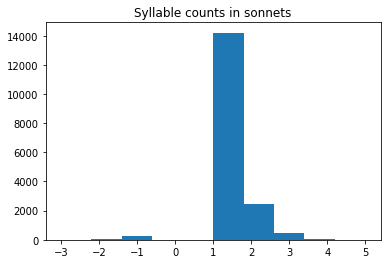

In [4]:
syluse = [syldict[w][0] if w in syldict else 0 for s in data for l in s for w in l]

plt.title("Syllable counts in sonnets")
plt.hist(syluse)

(array([   2.,   38.,   86.,    2.,    0., 1336., 1320.,  342.,   76.,
           3.]),
 array([-3. , -2.2, -1.4, -0.6,  0.2,  1. ,  1.8,  2.6,  3.4,  4.2,  5. ]),
 <a list of 10 Patch objects>)

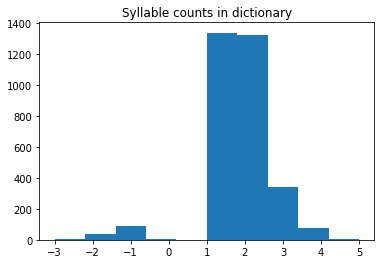

In [5]:
plt.title("Syllable counts in dictionary")
plt.hist([syldict[w][0] for w in syldict])

In [6]:
# line lengths
lwords = [len(l) for s in data for l in s]
lchars = [sum([len(w) for w in l])+len(l)-1 for s in data for l in s]
lsyls = [sum([abs(syldict[w][0]) for w in l]) for s in data for l in s]

(array([  0.,   0.,   0.,   0.,   0.,  24., 154., 407., 694., 625., 249.,
          2.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 14 Patch objects>)

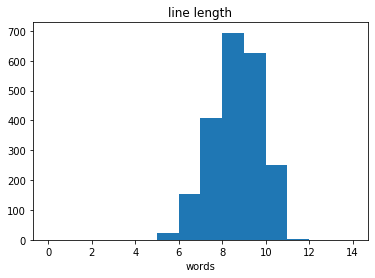

In [7]:
plt.title("line length")
plt.xlabel("words")
plt.hist(lwords, bins=range(15))

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   6.,   2.,  20.,
         31.,  35.,  70.,  90., 129., 168., 172., 222., 227., 197., 182.,
        161., 136.,  92.,  67.,  49.,  35.,  28.,  13.,  10.,   3.,   3.,
          1.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
 <a list of 79 Patch objects>)

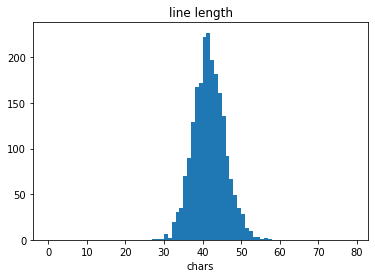

In [8]:
plt.title("line length")
plt.xlabel("chars")
plt.hist(lchars, bins=range(80))

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,   23.,
         259., 1858.,   15.,    0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 13 Patch objects>)

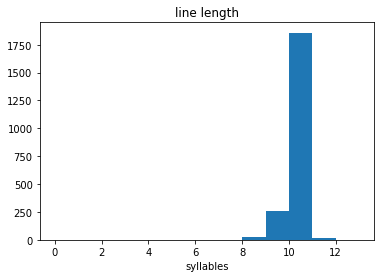

In [9]:
plt.title("line length")
plt.xlabel("syllables")
plt.hist(lsyls, bins=range(14))

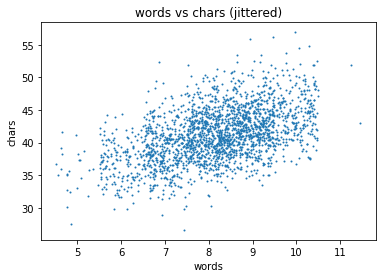

In [10]:
plt.title("words vs chars (jittered)")
plt.xlabel("words")
plt.ylabel("chars")
jitter = lambda x: np.array(x) + (np.random.rand(len(x))-.5)
plt.scatter(jitter(lwords), jitter(lchars), s=1)